<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 15, 2021

In [ ]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#used describe function for data exploration
#df.describe(include = 'all')

In [ ]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [ ]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)
display(df)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
#df.dropna(subset = ["Year"], inplace=True)
#df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
#df = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
#df = df[~df.Group.str.contains('By Year|By Total', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)


#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
#df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
#df['Year'] = df['Year'].astype(int, errors = 'raise')
#df['Month'] = df['Month'].astype(int, errors = 'raise')

#combine Year and Month into one column
#df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

#replace condition with ICD numerical codes?
df['Condition']=df['Condition'].str.replace('Adult respiratory distress syndrome','1.0')
df['Condition']=df['Condition'].str.replace('COVID-19','2.0')
df['Condition']=df['Condition'].str.replace('Cardiac arrest','3.0')
df['Condition']=df['Condition'].str.replace('Diabetes','4.0')
df['Condition']=df['Condition'].str.replace('Hypertensive diseases','5.0')
df['Condition']=df['Condition'].str.replace('Influenza and pneumonia','6.0')
df['Condition']=df['Condition'].str.replace('Ischemic heart disease','7.0')
df['Condition']=df['Condition'].str.replace('Renal failure','8.0')
df['Condition']=df['Condition'].str.replace('Respiratory failure','9.0')
df['Condition']=df['Condition'].str.replace('Sepsis','10.0')
df['Condition'] = df['Condition'].astype(float, errors = 'raise')

#df = pd.get_dummies(df, prefix='Condition', prefix_sep='.', 
#                            columns=['Condition'])

#df = pd.get_dummies(df, prefix='AgeGroup', prefix_sep='.', 
#                            columns=['AgeGroup'])

df = df.reset_index(drop=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,ConditionGroup,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


,Condition,AgeGroup,CV19_Deaths
0,6.0,29.5,1999.0
1,6.0,39.5,5293.0
2,6.0,49.5,15615.0
3,6.0,59.5,39217.0
4,6.0,69.5,67238.0
...,...,...,...
29241,2.0,85.0,62.0
29242,2.0,85.0,23.0
29243,2.0,85.0,13.0
29244,2.0,85.0,25.0


In [ ]:
#import numpy as np

#table = df.pivot_table(index='Condition', columns='State', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
#display(table)

#import numpy as np

#table2 = df.pivot_table(index='Condition', columns='AgeGroup', values='CV19_Deaths', fill_value = 0)
#display(table)

#pd.set_option('precision', 0)
#df_single_level_cols = df.pivot_table(index=['Condition'],columns=['State','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,60,70,80,90,100]);

In [ ]:
#find a way to stack the dummy variable columns and then find a way to use corr for the 3 variables CVDeaths, AgeGroup(stacked) and Condition(Stacked)

#pd.set_option('precision', 0)
#df_single_level_cols = ndf.pivot_table(index=['Condition'],columns=['Condition','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#s2 = pd.Series(dummies.columns[np.where(dummies!=0)[1]])

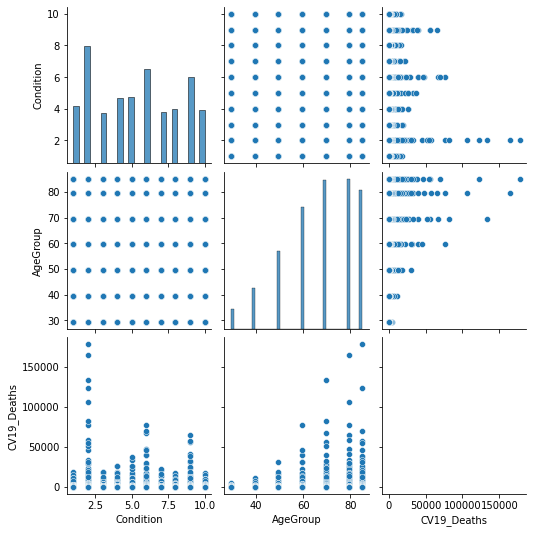

In [ ]:
#use seaborn pairplot to show correlation
import seaborn as sns

sns.pairplot(df)

In [ ]:
#use corr() function to show correlation
corr = df.corr()

display(corr)

,Condition,AgeGroup,CV19_Deaths
Condition,1.000000,0.058332,-0.027993
AgeGroup,0.058332,1.000000,0.044309
CV19_Deaths,-0.027993,0.044309,1.000000


In [ ]:
#combined data set
import numpy as np
print(df.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(df.corr().abs().nlargest(3, 'CV19_Deaths').values[:13])

Index(['CV19_Deaths', 'AgeGroup', 'Condition'], dtype='object')
[[0.02799267 0.04430923 1.        ]
 [0.05833189 1.         0.04430923]
 [1.         0.05833189 0.02799267]]


Text(0, 0.5, 'CV19_Deaths')

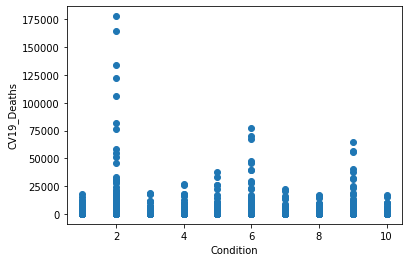

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['Condition'], df['CV19_Deaths'], marker='o')
plt.xlabel('Condition')
plt.ylabel('CV19_Deaths')

Text(0, 0.5, 'CV19_Deaths')

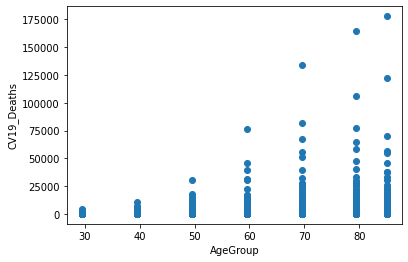

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['AgeGroup'], df['CV19_Deaths'], marker='o')
plt.xlabel('AgeGroup')
plt.ylabel('CV19_Deaths')

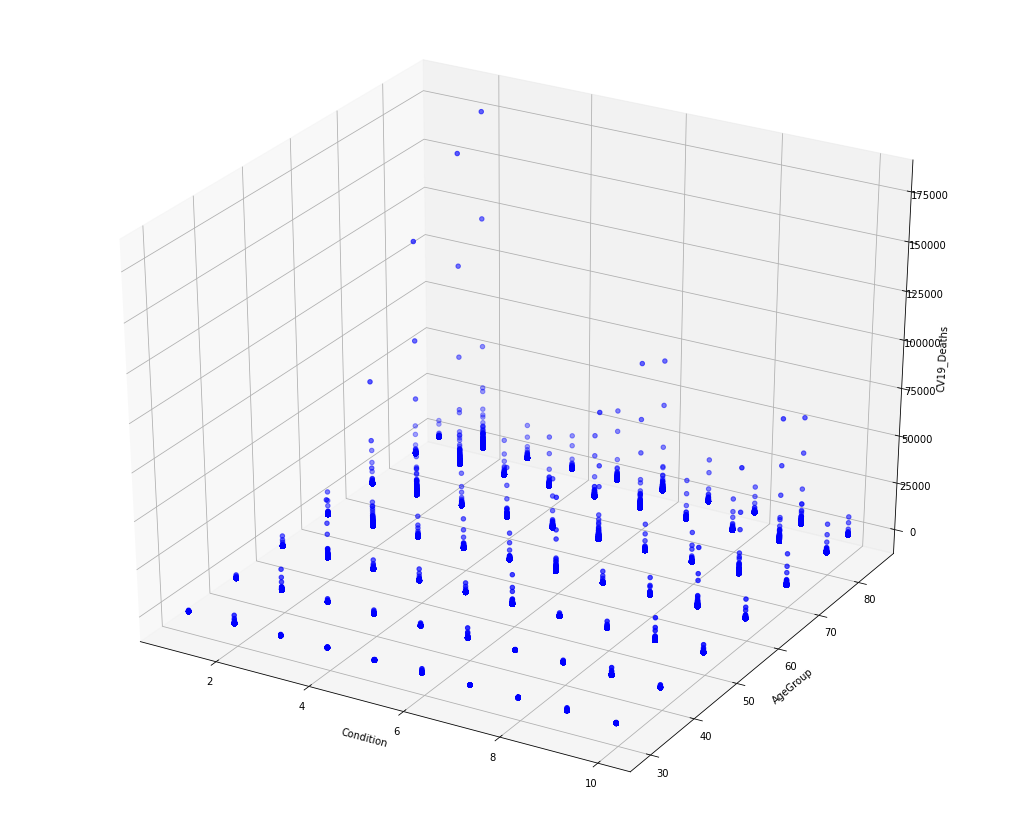

In [ ]:
#3d rendering of colums with high correlation
import numpy as np

%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Condition'],
          df['AgeGroup'],
          df['CV19_Deaths'],
          c='b')

ax.set_xlabel("Condition")
ax.set_ylabel("AgeGroup")
ax.set_zlabel("CV19_Deaths")
plt.show()


In [ ]:
##Create data frames to split the data
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']], columns = ['AgeGroup','CV19_Deaths'])
y = Condition_encoded

#import train_test_split function and assign 30% of data for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

NameError: ignored

In [ ]:
#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(75, 2)
(75,)


In [ ]:
#build the LinearRegression model and fit the train sets
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#print the incercept and data frame showing coefficient
print(model.intercept_)

pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

2.0023529411764707


,Coeff
AgeGroup,-0.043074
CV19_Deaths,0.069499


Text(0.5, 1.0, 'Actual vs Predicted')

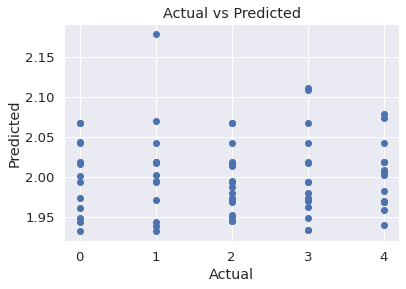

In [ ]:
#make CV-19 Deaths prediction and compare with actual values

pred = model.predict(x_test)

plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

(array([13.,  0., 13.,  0.,  6., 13.,  0., 16.,  0., 14.]),
 array([-2.06698128, -1.65424386, -1.24150645, -0.82876903, -0.41603161,
        -0.00329419,  0.40944323,  0.82218064,  1.23491806,  1.64765548,
         2.0603929 ]),
 <a list of 10 Patch objects>)

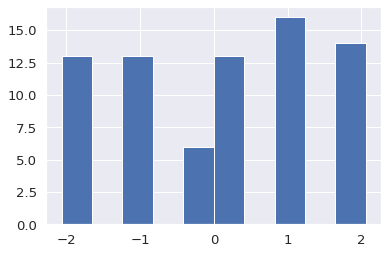

In [ ]:
#plot difference between actual values and predicted values
plt.hist(y_test - pred)

In [ ]:
#calculate MSE and R-Squared
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
print('Mean Squared Error:', mse)

print('R-Squared: %.4f' % model.score(x_test,y_test))

Mean Squared Error: 1.8302828937876676
R-Squared: -0.0044


In [ ]:
print(model.predict([[2.0, 85.0]]))

[7.82361401]


In [ ]:
#Begin Logistic model - Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#read data
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')


In [ ]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Sepsis'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Adult respiratory distress syndrome'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Renal failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'COVID-19'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

#df = pd.get_dummies(df, prefix='Condition', prefix_sep='.', 
#                            columns=['Condition'], drop_first=True)

df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
15269,Diabetes,69.5,18.0
15270,Diabetes,79.5,13.0
15271,Diabetes,79.5,12.0
15272,Diabetes,79.5,10.0


In [ ]:
#reduce size of data set to manageable size
x=500
y=29246 
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
495,Respiratory failure,79.5,673.0
496,Respiratory failure,85.0,708.0
497,Hypertensive diseases,49.5,21.0
498,Hypertensive diseases,59.5,71.0


In [ ]:
#show columns in data frame
print(df.columns)

Index(['Condition', 'AgeGroup', 'CV19_Deaths'], dtype='object')


In [ ]:
#encode Condition types
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

Condition_encoded=le.fit_transform(df['Condition'])
display(Condition_encoded)

array([2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 4, 4, 4, 4, 1, 3, 0, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,

In [ ]:
#split the data and assign to variables
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']],
                       columns = ['AgeGroup','CV19_Deaths'])
y = Condition_encoded

#split the data using 15% for test size
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)


In [ ]:
#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(425, 2)
(425,)
(75, 2)
(75,)


In [ ]:
#Apply standardscaler function
from sklearn.preprocessing import StandardScaler


# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)


In [ ]:
#import LogisticRegression function and fit to the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

#assign x test set to new variable for prediction
pred = model.predict(x_test)

In [ ]:
#import functions to show accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print(acc)
print(cm)


0.14666666666666667
[[ 0  2 12  2  1]
 [ 0  1 10  2  0]
 [ 0  0  9  3  2]
 [ 0  0 12  1  1]
 [ 0  2 14  1  0]]


Joseph S Lopez
Week 6

In [ ]:
#Begin SVM model

#import necessary Python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Sepsis'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Adult respiratory distress syndrome'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Renal failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'COVID-19'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Diabetes'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Ischemic heart disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')


#row_index = df[df['CV19_Deaths'] >= 2500].index
#df.drop(row_index, inplace = True)

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')


df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
10367,Hypertensive diseases,69.5,10.0
10368,Hypertensive diseases,79.5,15.0
10369,Hypertensive diseases,79.5,12.0
10370,Hypertensive diseases,85.0,10.0


In [ ]:
#reduce data set to manageable size

x=5000
y=10372 
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
4995,Influenza and pneumonia,85.0,130.0
4996,Influenza and pneumonia,85.0,67.0
4997,Influenza and pneumonia,85.0,82.0
4998,Influenza and pneumonia,85.0,63.0


In [ ]:
#encode Conditions categories

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

Condition_encoded=le.fit_transform(df['Condition'])
display(Condition_encoded)

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#split the data and assign to variables
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths'],], columns = ['AgeGroup','CV19_Deaths'])
y = Condition_encoded
#y = df['Condition']

#split the data using 30% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=109)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(7260, 2)
(7260,)
(3112, 2)
(3112,)


In [ ]:
#import module
from sklearn import svm
#assign SVM classifier to variable
classif = svm.SVC(kernel='linear')

#train the model using training sets
classif.fit(x_train, y_train)

#create prediction variable
y_pred = classif.predict(x_test)

#points = df[['AgeGroup', 'CV19_Deaths']].values
#result = df['Condition']
#classif.fit(points, result)

print('Vector of weights (w) = ',classif.coef_[0])
print('b = ',classif.intercept_[0])
print('Indices of support vectors =',classif.support_vectors_)
print('Number of support vector for each class =', classif.n_support_)
print('Coefficients of the support vector in the decision function =',np.abs(classif.dual_coef_))

In [ ]:
#Measure SVM model
from sklearn import metrics

#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
print("Accuracy Score: ",metrics.accuracy_score(y_test, y_pred))

#Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
print("Recall Score: ",metrics.recall_score(y_test, y_pred, average='micro'))

#Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)
print("Precision Score: ",metrics.precision_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.37533333333333335
Recall Score:  0.37533333333333335
Precision Score:  0.37533333333333335


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


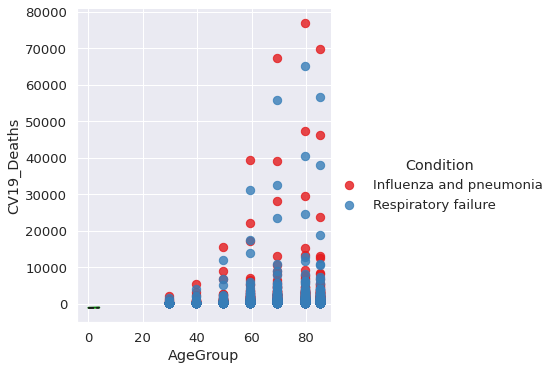

In [ ]:
#plot the hyperplane to show accuracy

w = classif.coef_[0]

slope = -w[0] / w[1]

b = classif.intercept_[0]

xx = np.linspace(0 , 4)
yy = slope * xx - (b / w[1])

s = classif.support_vectors_[0]
yy_down = slope * xx + (s[1] - slope * s[0])

s = classif.support_vectors_[-1]
yy_up = slope * xx + (s[1] - slope * s[0])

sns.lmplot('AgeGroup', 'CV19_Deaths', data=df, hue='Condition', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='green');

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [ ]:
#import metrics module
from sklearn import metrics

#check accuracy of model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5083479789103691


In [ ]:
#print precision and recall scores
print("Precision: ",metrics.precision_score(y_test, y_pred,pos_label='positive', average='micro'))
print("Recall: ",metrics.recall_score(y_test, y_pred,pos_label='positive', average='micro'))

Precision:  0.5083479789103691
Recall:  0.5083479789103691


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
#KNN model
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Sepsis'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Adult respiratory distress syndrome'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Renal failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'COVID-19'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Diabetes'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Ischemic heart disease'].index
df.drop(row_index, inplace = True)

#row_index = df[df['Condition'] == 'Hypertensive diseases'].index
#df.drop(row_index, inplace = True)


row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
10367,Hypertensive diseases,69.5,10.0
10368,Hypertensive diseases,79.5,15.0
10369,Hypertensive diseases,79.5,12.0
10370,Hypertensive diseases,85.0,10.0


In [ ]:
# reduce data set size
x=500
y=15275 
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
495,Influenza and pneumonia,79.5,219.0
496,Influenza and pneumonia,85.0,172.0
497,Respiratory failure,39.5,13.0
498,Respiratory failure,49.5,29.0


In [ ]:
#split the data
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']], columns = ['AgeGroup','CV19_Deaths'])
y = df['Condition']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(7260, 2)
(7260,)
(3112, 2)
(3112,)


In [ ]:
#Explore best value of K
df = pd.get_dummies(df, columns=["Condition"])
df['AgeGroup'] = df['AgeGroup'].astype(int, errors = 'raise')
df['CV19_Deaths'] = df['CV19_Deaths'].astype(int, errors = 'raise')
df.dtypes

AgeGroup                             int64
CV19_Deaths                          int64
Condition_Hypertensive diseases      uint8
Condition_Influenza and pneumonia    uint8
Condition_Respiratory failure        uint8
dtype: object

In [ ]:
print(df.columns)

Index(['AgeGroup', 'CV19_Deaths', 'Condition_Diabetes',
       'Condition_Hypertensive diseases', 'Condition_Influenza and pneumonia',
       'Condition_Ischemic heart disease', 'Condition_Respiratory failure'],
      dtype='object')


In [ ]:
# OR split the data after encoding
x = df.drop(df.iloc[:,2:7], axis = 1)
y = df.iloc[:,2:7]

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(int))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=4)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#train model
model = KNeighborsClassifier(n_neighbors=3)

model.fit(x,y)
y_pred = model.predict(x_test)

#make prediction
predicted = model.predict([[10,1000]])
print(predicted)

['Influenza and pneumonia']


In [ ]:
#Measure KNN model
from sklearn import metrics

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
print("Accuracy Score: ",metrics.accuracy_score(y_test, y_pred))

# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)
print("Recall Score: ",metrics.recall_score(y_test, y_pred, average='micro'))

# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)
print("Precision Score: ",metrics.precision_score(y_test, y_pred, average='micro'))

Accuracy Score:  0.4662596401028278
Recall Score:  0.4662596401028278
Precision Score:  0.4662596401028278


In [ ]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#train the model and make prediction based on value of k
k = 1  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
pred_y = neigh.predict(x_test)
print("Accuracy of model at K = 1 is",metrics.accuracy_score(y_test, pred_y))

Accuracy of model at K = 1 is 0.5039525691699605


Maximum accuracy score is:  0.5098814229249012


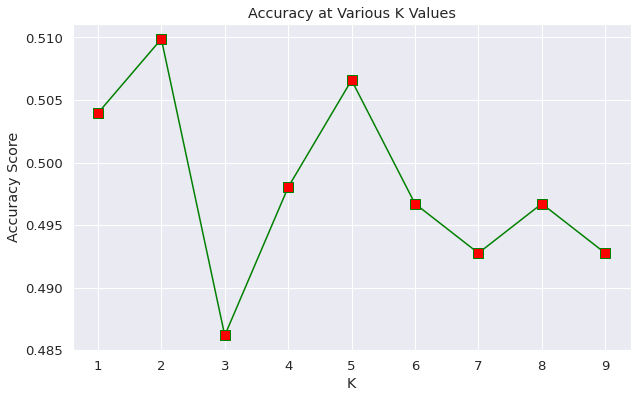

In [ ]:
from sklearn import metrics

#store values in array
acc = []

#find values of K in range of 10
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'green',linestyle='solid', marker='s',markerfacecolor='red', markersize=10)
plt.title('Accuracy at Various K Values')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

#print max value from acc array
print("Maximum accuracy score is: ", max(acc))

Joseph S Lopez Week 7

In [ ]:
#import necessary Python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Sepsis'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Adult respiratory distress syndrome'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Renal failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'COVID-19'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Diabetes'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Ischemic heart disease'].index
df.drop(row_index, inplace = True)

row_index = df[df['Condition'] == 'Hypertensive diseases'].index
df.drop(row_index, inplace = True)


row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
7581,Respiratory failure,85.0,14.0
7582,Respiratory failure,85.0,20.0
7583,Respiratory failure,85.0,32.0
7584,Respiratory failure,85.0,25.0


In [ ]:
#reduce data set to manageable size

x=500
y=15274 
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
495,Influenza and pneumonia,39.5,15.0
496,Influenza and pneumonia,49.5,40.0
497,Influenza and pneumonia,59.5,117.0
498,Influenza and pneumonia,69.5,218.0


In [ ]:
#encode Conditions categories

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

Condition_encoded=le.fit_transform(df['Condition'])
display(Condition_encoded)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#apply 10-cross fold validation to Logistic Regression

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']], columns = ['AgeGroup','CV19_Deaths'])
y = Condition_encoded

log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, x, y, cv=10, scoring='accuracy').mean()

print(log_regress_score)

#add score to array
result = []
result.append(log_regress_score)

0.518


In [ ]:
#apply 10-cross fold validation to KNN
from sklearn.neighbors import KNeighborsClassifier

cv_scores = []

folds = 10

ks = list(range(1, int(len(x) * ((folds - 1)/folds)), 2))

for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, x, y, cv=folds, scoring='accuracy').mean()
  cv_scores.append(score)

knn_score = max(cv_scores)

print(knn_score)

#add score to array
result.append(knn_score)


0.556


In [ ]:
#apply 10-cross fold validation to SVM Linear

from sklearn import svm

linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, x, y, cv=10, scoring='accuracy').mean()

print(linear_svm_score)

#add score to array
result.append(linear_svm_score)

0.514


In [ ]:
#apply 10-cross fold validation to SVM RBF Kernel

rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, x, y, cv=10, scoring='accuracy').mean()

print(rbf_score)

#add score to array
result.append(rbf_score)

0.518


In [ ]:
#algorithm evaluation

#assign algorithm names to variable
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result, index = algorithms)

#assign column header
cv_mean.columns=["Accuracy"]

#print array of algorithms by accuracy score in ascending order
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.556
Logistic Regression,0.518
SVM RBF Kernel,0.518
SVM Linear Kernel,0.514


Joseph S Lopez Week 8

In [29]:
#import necessary Python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [30]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type integer
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('0-24','12')
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,12.0,443.0
1,Influenza and pneumonia,29.5,1999.0
2,Influenza and pneumonia,39.5,5293.0
3,Influenza and pneumonia,49.5,15615.0
4,Influenza and pneumonia,59.5,39217.0
...,...,...,...
47978,COVID-19,85.0,62.0
47979,COVID-19,85.0,23.0
47980,COVID-19,85.0,13.0
47981,COVID-19,85.0,25.0


In [31]:
age12_Inf = df.loc[(df['Condition'] == 'Influenza and pneumonia') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Inf = df.loc[(df['Condition'] == 'Influenza and pneumonia') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Inf = df.loc[(df['Condition'] == 'Influenza and pneumonia') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Inf = df.loc[(df['Condition'] == 'Influenza and pneumonia') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Inf = df.loc[(df['Condition'] == 'Influenza and pneumonia') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Inf = df.loc[(df['Condition'] == 'Influenza and pneumonia') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Inf = df.loc[(df['Condition'] == 'Influenza and pneumonia') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Inf = df.loc[(df['Condition'] == 'Influenza and pneumonia') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Clr = df.loc[(df['Condition'] == 'Chronic lower respiratory diseases') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Clr = df.loc[(df['Condition'] == 'Chronic lower respiratory diseases') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Clr = df.loc[(df['Condition'] == 'Chronic lower respiratory diseases') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Clr = df.loc[(df['Condition'] == 'Chronic lower respiratory diseases') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Clr = df.loc[(df['Condition'] == 'Chronic lower respiratory diseases') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Clr = df.loc[(df['Condition'] == 'Chronic lower respiratory diseases') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Clr = df.loc[(df['Condition'] == 'Chronic lower respiratory diseases') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Clr = df.loc[(df['Condition'] == 'Chronic lower respiratory diseases') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Ard = df.loc[(df['Condition'] == 'Adult respiratory distress syndrome') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Ard = df.loc[(df['Condition'] == 'Adult respiratory distress syndrome') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Ard = df.loc[(df['Condition'] == 'Adult respiratory distress syndrome') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Ard = df.loc[(df['Condition'] == 'Adult respiratory distress syndrome') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Ard = df.loc[(df['Condition'] == 'Adult respiratory distress syndrome') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Ard = df.loc[(df['Condition'] == 'Adult respiratory distress syndrome') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Ard = df.loc[(df['Condition'] == 'Adult respiratory distress syndrome') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Ard = df.loc[(df['Condition'] == 'Adult respiratory distress syndrome') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Ref = df.loc[(df['Condition'] == 'Respiratory failure') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Ref = df.loc[(df['Condition'] == 'Respiratory failure') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Ref = df.loc[(df['Condition'] == 'Respiratory failure') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Ref = df.loc[(df['Condition'] == 'Respiratory failure') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Ref = df.loc[(df['Condition'] == 'Respiratory failure') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Ref = df.loc[(df['Condition'] == 'Respiratory failure') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Ref = df.loc[(df['Condition'] == 'Respiratory failure') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Ref = df.loc[(df['Condition'] == 'Respiratory failure') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Rea = df.loc[(df['Condition'] == 'Respiratory arrest') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Rea = df.loc[(df['Condition'] == 'Respiratory arrest') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Rea = df.loc[(df['Condition'] == 'Respiratory arrest') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Rea = df.loc[(df['Condition'] == 'Respiratory arrest') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Rea = df.loc[(df['Condition'] == 'Respiratory arrest') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Rea = df.loc[(df['Condition'] == 'Respiratory arrest') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Rea = df.loc[(df['Condition'] == 'Respiratory arrest') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Rea = df.loc[(df['Condition'] == 'Respiratory arrest') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Odr = df.loc[(df['Condition'] == 'Other diseases of the respiratory system') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Odr = df.loc[(df['Condition'] == 'Other diseases of the respiratory system') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Odr = df.loc[(df['Condition'] == 'Other diseases of the respiratory system') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Odr = df.loc[(df['Condition'] == 'Other diseases of the respiratory system') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Odr = df.loc[(df['Condition'] == 'Other diseases of the respiratory system') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Odr = df.loc[(df['Condition'] == 'Other diseases of the respiratory system') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Odr = df.loc[(df['Condition'] == 'Other diseases of the respiratory system') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Odr = df.loc[(df['Condition'] == 'Other diseases of the respiratory system') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Hyd = df.loc[(df['Condition'] == 'Hypertensive diseases') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Hyd = df.loc[(df['Condition'] == 'Hypertensive diseases') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Hyd = df.loc[(df['Condition'] == 'Hypertensive diseases') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Hyd = df.loc[(df['Condition'] == 'Hypertensive diseases') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Hyd = df.loc[(df['Condition'] == 'Hypertensive diseases') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Hyd = df.loc[(df['Condition'] == 'Hypertensive diseases') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Hyd = df.loc[(df['Condition'] == 'Hypertensive diseases') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Hyd = df.loc[(df['Condition'] == 'Hypertensive diseases') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Ihd = df.loc[(df['Condition'] == 'Ischemic heart disease') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Ihd = df.loc[(df['Condition'] == 'Ischemic heart disease') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Ihd = df.loc[(df['Condition'] == 'Ischemic heart disease') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Ihd = df.loc[(df['Condition'] == 'Ischemic heart disease') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Ihd = df.loc[(df['Condition'] == 'Ischemic heart disease') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Ihd = df.loc[(df['Condition'] == 'Ischemic heart disease') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Ihd = df.loc[(df['Condition'] == 'Ischemic heart disease') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Ihd = df.loc[(df['Condition'] == 'Ischemic heart disease') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Car = df.loc[(df['Condition'] == 'Caridac arrest') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Car = df.loc[(df['Condition'] == 'Caridac arrest') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Car = df.loc[(df['Condition'] == 'Caridac arrest') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Car = df.loc[(df['Condition'] == 'Caridac arrest') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Car = df.loc[(df['Condition'] == 'Caridac arrest') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Car = df.loc[(df['Condition'] == 'Caridac arrest') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Car = df.loc[(df['Condition'] == 'Caridac arrest') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Car = df.loc[(df['Condition'] == 'Caridac arrest') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Caa = df.loc[(df['Condition'] == 'Cardiac arrhythmia') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Caa = df.loc[(df['Condition'] == 'Cardiac arrhythmia') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Caa = df.loc[(df['Condition'] == 'Cardiac arrhythmia') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Caa = df.loc[(df['Condition'] == 'Cardiac arrhythmia') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Caa = df.loc[(df['Condition'] == 'Cardiac arrhythmia') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Caa = df.loc[(df['Condition'] == 'Cardiac arrhythmia') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Caa = df.loc[(df['Condition'] == 'Cardiac arrhythmia') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Caa = df.loc[(df['Condition'] == 'Cardiac arrhythmia') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Hea = df.loc[(df['Condition'] == 'Heart failure') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Hea = df.loc[(df['Condition'] == 'Heart failure') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Hea = df.loc[(df['Condition'] == 'Heart failure') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Hea = df.loc[(df['Condition'] == 'Heart failure') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Hea = df.loc[(df['Condition'] == 'Heart failure') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Hea = df.loc[(df['Condition'] == 'Heart failure') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Hea = df.loc[(df['Condition'] == 'Heart failure') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Hea = df.loc[(df['Condition'] == 'Heart failure') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Cer = df.loc[(df['Condition'] == 'Cerebrovascular diseases') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Cer = df.loc[(df['Condition'] == 'Cerebrovascular diseases') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Cer = df.loc[(df['Condition'] == 'Cerebrovascular diseases') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Cer = df.loc[(df['Condition'] == 'Cerebrovascular diseases') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Cer = df.loc[(df['Condition'] == 'Cerebrovascular diseases') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Cer = df.loc[(df['Condition'] == 'Cerebrovascular diseases') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Cer = df.loc[(df['Condition'] == 'Cerebrovascular diseases') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Cer = df.loc[(df['Condition'] == 'Cerebrovascular diseases') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Odc = df.loc[(df['Condition'] == 'Other diseases of the circulatory system') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Odc = df.loc[(df['Condition'] == 'Other diseases of the circulatory system') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Odc = df.loc[(df['Condition'] == 'Other diseases of the circulatory system') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Odc = df.loc[(df['Condition'] == 'Other diseases of the circulatory system') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Odc = df.loc[(df['Condition'] == 'Other diseases of the circulatory system') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Odc = df.loc[(df['Condition'] == 'Other diseases of the circulatory system') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Odc = df.loc[(df['Condition'] == 'Other diseases of the circulatory system') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Odc = df.loc[(df['Condition'] == 'Other diseases of the circulatory system') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Sep = df.loc[(df['Condition'] == 'Sepsis') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Sep = df.loc[(df['Condition'] == 'Sepsis') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Sep = df.loc[(df['Condition'] == 'Sepsis') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Sep = df.loc[(df['Condition'] == 'Sepsis') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Sep = df.loc[(df['Condition'] == 'Sepsis') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Sep = df.loc[(df['Condition'] == 'Sepsis') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Sep = df.loc[(df['Condition'] == 'Sepsis') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Sep = df.loc[(df['Condition'] == 'Sepsis') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Mal = df.loc[(df['Condition'] == 'Malignant neoplasms') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Mal = df.loc[(df['Condition'] == 'Malignant neoplasms') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Mal = df.loc[(df['Condition'] == 'Malignant neoplasms') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Mal = df.loc[(df['Condition'] == 'Malignant neoplasms') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Mal = df.loc[(df['Condition'] == 'Malignant neoplasms') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Mal = df.loc[(df['Condition'] == 'Malignant neoplasms') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Mal = df.loc[(df['Condition'] == 'Malignant neoplasms') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Mal = df.loc[(df['Condition'] == 'Malignant neoplasms') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Dia = df.loc[(df['Condition'] == 'Diabetes') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Dia = df.loc[(df['Condition'] == 'Diabetes') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Dia = df.loc[(df['Condition'] == 'Diabetes') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Dia = df.loc[(df['Condition'] == 'Diabetes') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Dia = df.loc[(df['Condition'] == 'Diabetes') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Dia = df.loc[(df['Condition'] == 'Diabetes') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Dia = df.loc[(df['Condition'] == 'Diabetes') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Dia = df.loc[(df['Condition'] == 'Diabetes') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Obe = df.loc[(df['Condition'] == 'Obesity') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Obe = df.loc[(df['Condition'] == 'Obesity') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Obe = df.loc[(df['Condition'] == 'Obesity') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Obe = df.loc[(df['Condition'] == 'Obesity') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Obe = df.loc[(df['Condition'] == 'Obesity') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Obe = df.loc[(df['Condition'] == 'Obesity') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Obe = df.loc[(df['Condition'] == 'Obesity') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Obe = df.loc[(df['Condition'] == 'Obesity') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Alz = df.loc[(df['Condition'] == 'Alzheimer disease') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Alz = df.loc[(df['Condition'] == 'Alzheimer disease') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Alz = df.loc[(df['Condition'] == 'Alzheimer disease') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Alz = df.loc[(df['Condition'] == 'Alzheimer disease') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Alz = df.loc[(df['Condition'] == 'Alzheimer disease') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Alz = df.loc[(df['Condition'] == 'Alzheimer disease') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Alz = df.loc[(df['Condition'] == 'Alzheimer disease') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Alz = df.loc[(df['Condition'] == 'Alzheimer disease') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Vas = df.loc[(df['Condition'] == 'Vascular and unspecified dementia') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Vas = df.loc[(df['Condition'] == 'Vascular and unspecified dementia') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Vas = df.loc[(df['Condition'] == 'Vascular and unspecified dementia') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Vas = df.loc[(df['Condition'] == 'Vascular and unspecified dementia') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Vas = df.loc[(df['Condition'] == 'Vascular and unspecified dementia') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Vas = df.loc[(df['Condition'] == 'Vascular and unspecified dementia') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Vas = df.loc[(df['Condition'] == 'Vascular and unspecified dementia') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Vas = df.loc[(df['Condition'] == 'Vascular and unspecified dementia') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Ren = df.loc[(df['Condition'] == 'Renal failure') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Ren = df.loc[(df['Condition'] == 'Renal failure') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Ren = df.loc[(df['Condition'] == 'Renal failure') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Ren = df.loc[(df['Condition'] == 'Renal failure') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Ren = df.loc[(df['Condition'] == 'Renal failure') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Ren = df.loc[(df['Condition'] == 'Renal failure') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Ren = df.loc[(df['Condition'] == 'Renal failure') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Ren = df.loc[(df['Condition'] == 'Renal failure') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Int = df.loc[(df['Condition'] == 'Intential and unintential injury, poisoning, and other adverse events') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Int = df.loc[(df['Condition'] == 'Intential and unintential injury, poisoning, and other adverse events') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Int = df.loc[(df['Condition'] == 'Intential and unintential injury, poisoning, and other adverse events') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Int = df.loc[(df['Condition'] == 'Intential and unintential injury, poisoning, and other adverse events') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Int = df.loc[(df['Condition'] == 'Intential and unintential injury, poisoning, and other adverse events') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Int = df.loc[(df['Condition'] == 'Intential and unintential injury, poisoning, and other adverse events') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Int = df.loc[(df['Condition'] == 'Intential and unintential injury, poisoning, and other adverse events') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Int = df.loc[(df['Condition'] == 'Intential and unintential injury, poisoning, and other adverse events') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()

age12_Cov = df.loc[(df['Condition'] == 'COVID-19') & (df['AgeGroup'] == 12.0), 'CV19_Deaths'].sum()
age29_Cov = df.loc[(df['Condition'] == 'COVID-19') & (df['AgeGroup'] == 29.5), 'CV19_Deaths'].sum()
age39_Cov = df.loc[(df['Condition'] == 'COVID-19') & (df['AgeGroup'] == 39.5), 'CV19_Deaths'].sum()
age49_Cov = df.loc[(df['Condition'] == 'COVID-19') & (df['AgeGroup'] == 49.5), 'CV19_Deaths'].sum()
age59_Cov = df.loc[(df['Condition'] == 'COVID-19') & (df['AgeGroup'] == 59.5), 'CV19_Deaths'].sum()
age69_Cov = df.loc[(df['Condition'] == 'COVID-19') & (df['AgeGroup'] == 69.5), 'CV19_Deaths'].sum()
age79_Cov = df.loc[(df['Condition'] == 'COVID-19') & (df['AgeGroup'] == 79.5), 'CV19_Deaths'].sum()
age85_Cov = df.loc[(df['Condition'] == 'COVID-19') & (df['AgeGroup'] == 85.0), 'CV19_Deaths'].sum()




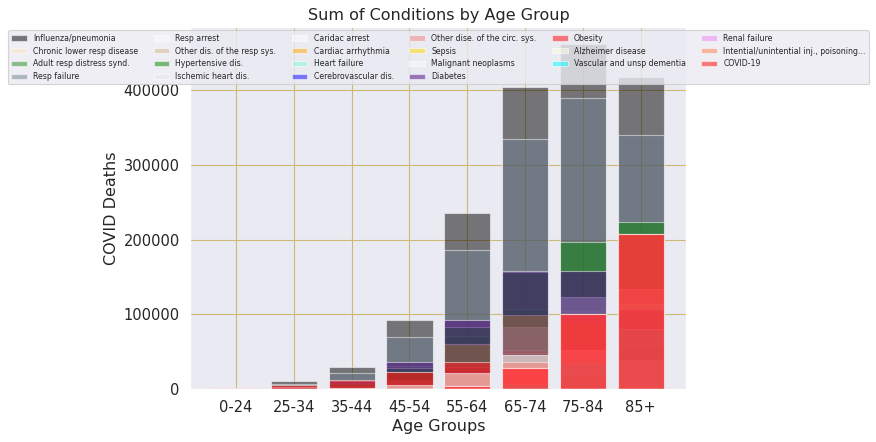

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

agegrp = ['0-24','25-34','35-44','45-54','55-64','65-74','75-84','85+']
Inf = [age12_Inf, age29_Inf, age39_Inf, age49_Inf, age59_Inf, age69_Inf, age79_Inf, age85_Inf] 
Clr = [age12_Clr, age29_Clr, age39_Clr, age49_Clr, age59_Clr, age69_Clr, age79_Clr, age85_Clr]       
Ard = [age12_Ard, age29_Ard, age39_Ard, age49_Ard, age59_Ard, age69_Ard, age79_Ard, age85_Ard]       
Ref = [age12_Ref, age29_Ref, age39_Ref, age49_Ref, age59_Ref, age69_Ref, age79_Ref, age85_Ref]
Rea = [age12_Rea, age29_Rea, age39_Rea, age49_Rea, age59_Rea, age69_Rea, age79_Rea, age85_Rea]
Odr = [age12_Odr, age29_Odr, age39_Odr, age49_Odr, age59_Odr, age69_Odr, age79_Odr, age85_Odr]
Hyd = [age12_Hyd, age29_Hyd, age39_Hyd, age49_Hyd, age59_Hyd, age69_Hyd, age79_Hyd, age85_Hyd]
Ihd = [age12_Ihd, age29_Ihd, age39_Ihd, age49_Ihd, age59_Ihd, age69_Ihd, age79_Ihd, age85_Ihd]
Car = [age12_Car, age29_Car, age39_Car, age49_Car, age59_Car, age69_Car, age79_Car, age85_Car]
Caa = [age12_Caa, age29_Caa, age39_Caa, age49_Caa, age59_Caa, age69_Caa, age79_Caa, age85_Caa]
Hea = [age12_Hea, age29_Hea, age39_Hea, age49_Hea, age59_Hea, age69_Hea, age79_Hea, age85_Hea]
Cer = [age12_Cer, age29_Cer, age39_Cer, age49_Cer, age59_Cer, age69_Cer, age79_Cer, age85_Cer]
Odc = [age12_Odc, age29_Odc, age39_Odc, age49_Odc, age59_Odc, age69_Odc, age79_Odc, age85_Odc] 
Sep = [age12_Sep, age29_Sep, age39_Sep, age49_Sep, age59_Sep, age69_Sep, age79_Sep, age85_Sep]
Mal = [age12_Mal, age29_Mal, age39_Mal, age49_Mal, age59_Mal, age69_Mal, age79_Mal, age85_Mal]
Dia = [age12_Dia, age29_Dia, age39_Dia, age49_Dia, age59_Dia, age69_Dia, age79_Dia, age85_Dia]
Obe = [age12_Obe, age29_Obe, age39_Obe, age49_Obe, age59_Obe, age69_Obe, age79_Obe, age85_Obe]
Alz = [age12_Alz, age29_Alz, age39_Alz, age49_Alz, age59_Alz, age69_Alz, age79_Alz, age85_Alz]
Vas = [age12_Vas, age29_Vas, age39_Vas, age49_Vas, age59_Vas, age69_Vas, age79_Vas, age85_Vas]
Ren = [age12_Vas, age29_Vas, age39_Vas, age49_Vas, age59_Vas, age69_Vas, age79_Vas, age85_Vas]
Int = [age12_Vas, age29_Vas, age39_Vas, age49_Vas, age59_Vas, age69_Vas, age79_Vas, age85_Vas]
Cov = [age12_Cov, age29_Cov, age39_Cov, age49_Cov, age59_Cov, age69_Cov, age79_Cov, age85_Cov]

plt.bar(
    agegrp,
    Inf,
    label = "Influenza/pneumonia",
    color = "black",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Clr,
    label = "Chronic lower resp disease",
    color = "bisque",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Ard,
    label = "Adult resp distress synd.",
    color = "forestgreen",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Ref,
    label = "Resp failure",
    color = "slategrey",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Rea,
    label = "Resp arrest",
    color = "white",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Odr,
    label = "Other dis. of the resp sys.",
    color = "tan",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Hyd,
    label = "Hypertensive dis.",
    color = "green",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Ihd,
    label = "Ischemic heart dis.",
    color = "lavender",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Car,
    label = "Caridac arrest",
    color = "white",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Caa,
    label = "Cardiac arrhythmia",
    color = "orange",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Hea,
    label = "Heart failure",
    color = "aquamarine",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Cer,
    label = "Cerebrovascular dis.",
    color = "blue",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Odc,
    label = "Other dise. of the circ. sys.",
    color = "lightcoral",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Sep,
    label = "Sepsis",
    color = "gold",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Mal,
    label = "Malignant neoplasms",
    color = "azure",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Dia,
    label = "Diabetes",
    color = "indigo",
    align = "center",
    alpha = 0.5
)

plt.bar(
    agegrp,
    Obe,
    label = "Obesity",
    color = "red",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Mal,
    label = "Alzheimer disease",
    color = "lightyellow",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Alz,
    label = "Vascular and unsp dementia",
    color = "aqua",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Vas,
    label = "Renal failure",
    color = "violet",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Ren,
    label = "Intential/unintential inj., poisoning...",
    color = "coral",
    align = "center",
    alpha = 0.5
)
plt.bar(
    agegrp,
    Int,
    label = "COVID-19",
    color = "red",
    align = "center",
    alpha = 0.5
)

plt.title("Sum of Conditions by Age Group")
plt.xlabel("Age Groups")
plt.ylabel("COVID Deaths")

plt.legend(loc='upper center', ncol=6, prop={'size':7})
plt.grid(True, color="y")

In [ ]:
#encode Condition values in new column
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['Condition_Cat'] = le.fit_transform(df['Condition'])
display(df)

,Condition,AgeGroup,CV19_Deaths,Condition_Cat
0,Influenza and pneumonia,12.0,443.0,10
1,Influenza and pneumonia,29.5,1999.0,10
2,Influenza and pneumonia,39.5,5293.0,10
3,Influenza and pneumonia,49.5,15615.0,10
4,Influenza and pneumonia,59.5,39217.0,10
...,...,...,...,...
47978,COVID-19,85.0,62.0,2
47979,COVID-19,85.0,23.0,2
47980,COVID-19,85.0,13.0,2
47981,COVID-19,85.0,25.0,2


In [ ]:
#Convert to type integer for use in KNN model
df['AgeGroup'] = df['AgeGroup'].astype(int, errors = 'raise')
df['CV19_Deaths'] = df['CV19_Deaths'].astype(int, errors = 'raise')
df.dtypes

Condition        object
AgeGroup          int64
CV19_Deaths       int64
Condition_Cat     int64
dtype: object

In [ ]:
#split the data
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']], columns = ['AgeGroup','CV19_Deaths'])
y = df['Condition_Cat']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(33588, 2)
(33588,)
(14395, 2)
(14395,)


In [ ]:
#train model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#use best value for k
k = 8
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

y_pred = knn.predict(x_test)

print("Accuracy of model at K = 8 is",metrics.accuracy_score(y_test, y_pred))

Accuracy of model at K = 7 is 0.08370962139631817


In [ ]:
#make prediction
predictiona = knn.predict([[40,20000]])
print(predictiona)
prediction = le.inverse_transform(predictiona)
print(prediction)

Maximum accuracy score is:  0.08370962139631817


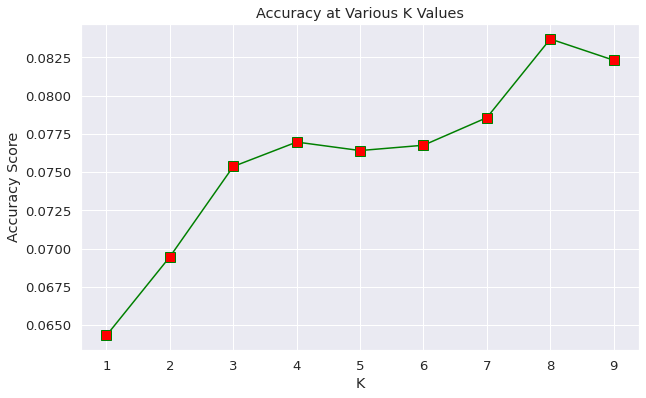

In [ ]:
from sklearn import metrics

#store values in array
acc = []

#find values of K in range of 10
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'green',linestyle='solid', marker='s',markerfacecolor='red', markersize=10)
plt.title('Accuracy at Various K Values')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

#print max value from acc array
print("Maximum accuracy score is: ", max(acc))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


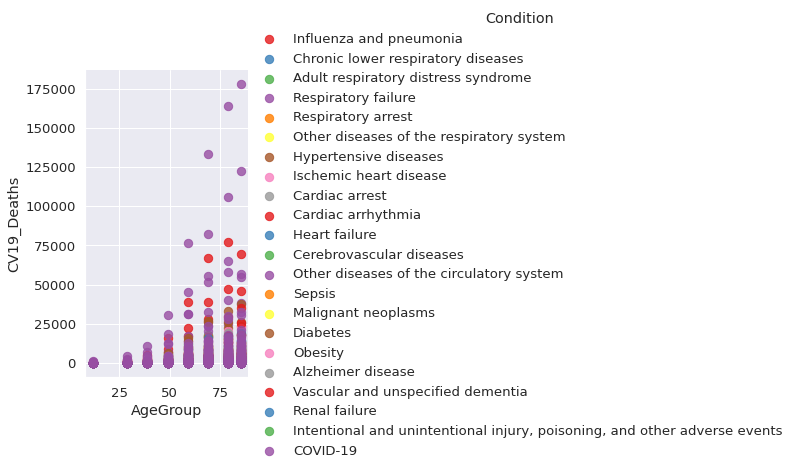

In [ ]:
#plot chart with all pre-existing conditions by age group
sns.lmplot('AgeGroup', 'CV19_Deaths', data=df, hue='Condition', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [ ]:
#import necessary library to translate to binary code
import pickle

#save the model to disk
filename = 'covid.sav'

pickle.dump(knn, open(filename, 'wb'))

In [ ]:
#load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
#do some predictions for validation

AgeGroup = 40
CV19_Deaths = 200000

prediction = loaded_model.predict([[AgeGroup, CV19_Deaths]])
print(prediction)

#reverse encoding to see string value returned
predict = le.inverse_transform(prediction)
print(predict)


[2]
['COVID-19']


In [ ]:
#probabilities of prediction
proba = loaded_model.predict_proba([[AgeGroup, CV19_Deaths]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.         0.         0.42857143 0.14285714 0.         0.
  0.         0.         0.14285714 0.         0.         0.
  0.14285714 0.         0.         0.         0.         0.
  0.         0.14285714 0.         0.        ]]
Confidence: 42.86%


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

df = pd.read_csv("https://raw.githubusercontent.com/kaustubhgupta/Technocolab-Final-Project/master/Data/cleaned.csv",  index_col=None)
X = df.drop(['track_id', 'genre_top'], axis=1)
y = df.genre_top

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

Pkl_Filename = "model_tree.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(tree, file)

In [4]:
!pip install pydantic

     |████████████████████████████████| 10.1 MB 29.6 MB/s 


In [5]:
from pydantic import BaseModel

class Music(BaseModel):
    acousticness: float 
    danceability: float 
    energy: float 
    instrumentalness: float 
    liveness: float 
    speechiness: float 
    tempo: float 
    valence: float
    class Config:
        schema_extra = {
            "example": {
                "acousticness": 0.838816, 
                "danceability": 0.542950, 
                "energy": 0.669215,
                "instrumentalness": 0.000006,
                "liveness": 0.105610,
                "speechiness": 0.391221,
                "tempo": 111.894,
                "valence": 0.796073
            }
        }

In [7]:
!pip install fastapi

     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 60 kB 8.7 MB/s 


In [8]:

from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("model_tree.pkl", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_music_category(data: Music):
    received = data.dict()
    acousticness = received['acousticness']
    danceability = received['danceability']
    energy = received['energy']
    instrumentalness = received['instrumentalness']
    liveness = received['liveness']
    speechiness = received['speechiness']
    tempo = received['tempo']
    valence = received['valence']
    pred_name = model.predict([[acousticness, danceability, energy,
                                instrumentalness, liveness, speechiness, tempo, valence]]).tolist()[0]
    return {'prediction': pred_name}

In [10]:
!pip install colabcode

     |████████████████████████████████| 745 kB 28.3 MB/s 
     |████████████████████████████████| 8.3 MB 2.4 MB/s 
     |████████████████████████████████| 45 kB 4.1 MB/s 
     |████████████████████████████████| 428 kB 40.8 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 392 kB 39.2 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 122 kB 63.5 MB/s 
     |████████████████████████████████| 77 kB 7.3 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 122 kB 75.0 MB/s 
     |████████████████████████████████| 122 kB 73.8 MB/s 
     |████████████████████████████████| 112 kB 79.2 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=2c3ffb335b3e8b9e646eb089cb0d159d4c86ad8f843834c4fc79f80955b8f098
  Stored in directory: /root/.cache/pip/wheels/bf

In [11]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [12]:
server.run_app(app=app)

Public URL: NgrokTunnel: "https://cb6e-35-245-16-135.ngrok.io" -> "http://localhost:10000"


INFO:     Started server process [62]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [62]


In [ ]:
#deploy in Colab

class Condition():
  AgeGroup: int
  CV19_Deaths: int
  Condition_Cat: int
  class Config:
    schema_extra = {
        "example" : {
            "AgeGroup": 20,
            "CV19_Deaths": 20000
        }
    }



In [ ]:
!pip install fastapi
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
  global model
  model = pickle.load(open("knn.pk", "rb"))

@app.get('/')
def index():
  return {'message': 'API home'}

@app.post('/predict')
def covid_categories(data: df):
  received = data.dict()
  AgeGroup = received['AgeGroup']
  CV19_Deaths = received['CV19_Deaths']
  pred_name = model.predict([[AgeGroup,CV19_Deaths]])
  return {'prediction': pred_name}


ValueError: ignored

In [ ]:
from colabcode import colabcode

server = ColabCode(port=10000, code=False)

In [ ]:
server.run_app(app=app)